<a href="https://colab.research.google.com/github/tw-ilson/ds4420notebooks/blob/main/DS4420_SP23_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 
*DS 4420 Spring 2023* 

**Prof. Adam Anthony**

This assignment will walk you through the process of training and evaluating models. We will be working with the [SciKit Learn](https://scikit-learn.org/stable/user_guide.html) python libraries. You are absolutely expected to use outside sources to figure out how to complete this assignment.  The goal is to connect what you have learned in class with what exists in the real world.  Therefore, some points are left vague or unexplained -- the challenge of this assignment is for you to "figure it out" so make sure that you are asking questions if you are stuck and don't know where to find help.  

## Part 0 [10 pts] Warmup: Fit Ridge Regression
Below is some starter code to load the [.  For this first step, obtain a train/test split, and use [Ridge Classifier](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification) to find an initial fit and report the accuracy, F1 score, and display a ROC curve and roc_auc ([see classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)).

In [ ]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape
print(X.shape)
# add some noise to make the problem harder 
random_state = np.random.RandomState(0)
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

# TODO: train/test split and train a RidgeClassifier

(100, 4)


# Part 1: Feature Engineering 

We know that learning is better with stronger data. Let's do some feature engineering to make things a little easier on the classifier.  

TODO: create a pipeline and set up a workflow that uses the following components: 
- StandardScaler
- Normalizer 
- Variance Threshold
- KBest feature election to find the 100 best features using sklearn.feature_selection.mutual_info
- RidgeClassifier with alpha=1.0

[Basic Pre-processing](https://scikit-learn.org/stable/modules/preprocessing.html#).  

[Feature Selection pre-processing](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection)

Report the same statistics as from part 0.  

accuracy:  0.9
f1:  0.9056603773584906
ROC AUC:  0.9855769230769231


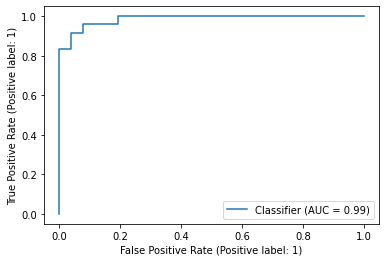

In [ ]:
# TODO : Build a pipeline as above.  

# Part 2: Parameter Tuning 

That's a lot better! Let's see if parameter tuning can help us even more.  Use a [GridSearchCV](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator) to find a better parameter for the Ridge parameter `alpha`, to evaluate the values `[.2, .4, .6, .8, 1]`.   Report the statistics again (tip: you might want to move the stats report into a function to make it easier to call).   

Question (please type answer here):  You should be passing the pipeline you built in the previous iteration, and not a new Ridge classifier.  Explain why this is important. 

Answer:  

{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('normalizer', Normalizer()), ('variancethreshold', VarianceThreshold()), ('selectkbest', SelectKBest(k=100, score_func=<function mutual_info_classif at 0x7fc257c333a0>)), ('ridgeclassifier', RidgeClassifier())], 'verbose': False, 'standardscaler': StandardScaler(), 'normalizer': Normalizer(), 'variancethreshold': VarianceThreshold(), 'selectkbest': SelectKBest(k=100, score_func=<function mutual_info_classif at 0x7fc257c333a0>), 'ridgeclassifier': RidgeClassifier(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'normalizer__copy': True, 'normalizer__norm': 'l2', 'variancethreshold__threshold': 0.0, 'selectkbest__k': 100, 'selectkbest__score_func': <function mutual_info_classif at 0x7fc257c333a0>, 'ridgeclassifier__alpha': 1.0, 'ridgeclassifier__class_weight': None, 'ridgeclassifier__copy_X': True, 'ridgeclassifier__fit_intercept': True, 'ridgeclassifier__max_iter': None

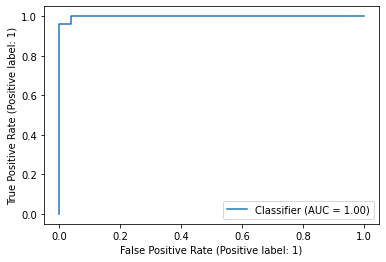

In [ ]:
# TODO: perform a grid search using the parameter range above. 

# Part 3: Nested CV 
That looks...pretty good!  Now, gain some confidence in our result by doing `nested` cross validation.  [Modify this example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py) to learn how to do nested cross validation, but modify it to use the pipeline you've already created. 

Question: You may have noticed (and worried!) that we used X and y and did not do a train/test split as we did earlier in the assignment.  Why is that safe here? 

Answer: 

Question: Explain the difference between the data given to the first instance of GridSearchCV  and the second instance.  

Answer:  

Average difference of 0.007581 with std. dev. of 0.007833.


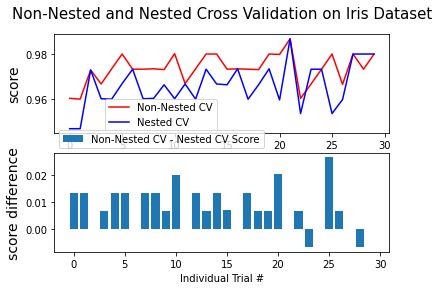

In [ ]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

# Number of random trials
NUM_TRIALS = 30

# NOTE: modified from original to use the data we formed at the start of the assignment. 

# TODO: set up parameters as before, and set clf to pipe 
p_grid = {}
clf = pipe 

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=clf, param_grid=p_grid, cv=outer_cv)
    clf.fit(X, y)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=clf, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation on Iris Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()

# Part 4: Try some other algorithms! 

Now that we are reporting some summary statistics for our classifier, let's compare it to some competition.  Check out the scikit [classifier user guide](https://scikit-learn.org/stable/supervised_learning.html) and learn enough about one other algorithm and perform the same analysis as above.  Augment the above plots to add 1-standard deviation error bars.  